In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import numpy as np
import json
import tweepy as tw
import nltk
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk import bigrams
import re
import networkx as nx
import igraph
import warnings
import community as community_louvain
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv('./dataset/network.csv')
df

,author_id,Source_author_id,weight
0,2692,1163618839,1
1,2692,4098100355,1
2,12590,1964734532,1
3,12917,15812284,1
4,29283,102594136,1
...,...,...,...
130704,1366258591406059520,1366256222765150208,1
130705,1366261165668540425,1366256222765150208,1
130706,1366396931740741634,1307398223695417088,2
130707,1366400345312739334,1307398223695417088,2


In [3]:
df.apply(lambda x: x.nunique())

author_id           81746
Source_author_id    25850
weight                 69
dtype: int64

In [4]:
id1=df.author_id.unique().tolist()
id2=df.Source_author_id.unique().tolist()
id3=id1+id2
id4 = list(set(id3)) 
dic_id = {id4[i]:i for i in range(len(id4))}
dic_id

{697407126499491840: 0,
 698731891168378880: 1,
 699214847578210304: 2,
 700758802425970688: 3,
 703399762431574017: 4,
 700792575544786949: 5,
 713711879940472836: 6,
 865865917741137920: 7,
 775206527774752768: 8,
 785576559612526592: 9,
 765698894365720577: 10,
 822474099825836035: 11,
 722734146162786307: 12,
 715149642418094084: 13,
 784761251150692357: 14,
 12: 15,
 1276790264158474240: 16,
 1370226720: 17,
 2999975971: 18,
 632815653: 19,
 104595495: 20,
 211025966: 21,
 4835770419: 22,
 2932604984: 23,
 341311547: 24,
 207880254: 25,
 487063619: 26,
 14417993: 27,
 820033091305672704: 28,
 823763365159964672: 29,
 1341229203673518080: 30,
 1322482041062100992: 31,
 724137275844661248: 32,
 138412111: 33,
 1332000118623637504: 34,
 502530129: 35,
 2784231505: 36,
 19136595: 37,
 786432096: 38,
 1329944179250761729: 39,
 1348735078587895809: 40,
 496762984: 41,
 331350122: 42,
 1409548399: 43,
 975599468501385218: 44,
 30670965: 45,
 4074766457: 46,
 1346589141396557826: 47,
 134

In [5]:
def apply_id(x):
    index=dic_id[x]
    return index

df["author_id"] = df["author_id"].apply(apply_id)
df["Source_author_id"] = df["Source_author_id"].apply(apply_id)

In [6]:
df.sort_values("author_id",inplace=True)
df

,author_id,Source_author_id,weight
59796,0,41485,1
59799,1,41485,1
59801,2,41485,1
59816,3,58879,2
60004,4,41485,1
...,...,...,...
129550,100367,10117,4
129551,100367,55442,1
29023,100368,18055,1
57752,100370,41485,1


In [7]:
df.to_csv("./dataset/network_order.csv",index=False)

In [8]:
data=pd.read_csv('./dataset/network_order.csv')
data

,author_id,Source_author_id,weight
0,0,41485,1
1,1,41485,1
2,2,41485,1
3,3,58879,2
4,4,41485,1
...,...,...,...
130704,100367,10117,4
130705,100367,55442,1
130706,100368,18055,1
130707,100370,41485,1


In [9]:
G = nx.from_pandas_edgelist(data, 'author_id', 'Source_author_id', ["weight"], create_using = nx.DiGraph())

In [10]:
print("Number of G1 nodes:",G.number_of_nodes())
print("Number of G1 edges:",G.size())

Number of G1 nodes: 100373
Number of G1 edges: 130709


In [11]:
G_componrnts=nx.strongly_connected_components(G)
largest_components=max(G_componrnts,key=len)

In [12]:
subgraph_nodes=list(largest_components)
G_subgraph=G.subgraph(subgraph_nodes)
H=G_subgraph.to_undirected()
print("Number of G1 nodes:",H.number_of_nodes())
print("Number of G1 edges:",H.size())

Number of G1 nodes: 412
Number of G1 edges: 900


In [13]:
df_small = nx.to_pandas_edgelist(H)
df_small

,source,target,weight
0,49152,78415,1
1,49152,91092,1
2,49152,4481,1
3,20481,31129,1
4,20481,43273,1
...,...,...,...
895,100237,100237,1
896,30669,30669,3
897,8160,8160,7
898,30697,30697,1


In [14]:
id1=df_small.source.unique().tolist()
id2=df_small.target.unique().tolist()
id3=id1+id2
id4 = list(set(id3)) 
dic_id = {id4[i]:i for i in range(len(id4))}
dic_id

{49152: 0,
 20481: 1,
 57361: 2,
 28695: 3,
 94236: 4,
 88102: 5,
 12333: 6,
 96317: 7,
 18497: 8,
 79952: 9,
 59475: 10,
 8276: 11,
 22616: 12,
 65625: 13,
 96351: 14,
 16485: 15,
 77927: 16,
 92271: 17,
 36986: 18,
 10363: 19,
 84100: 20,
 71818: 21,
 34958: 22,
 59535: 23,
 77982: 24,
 14498: 25,
 63653: 26,
 10411: 27,
 28845: 28,
 41138: 29,
 49333: 30,
 61625: 31,
 69819: 32,
 35003: 33,
 96446: 34,
 94401: 35,
 94409: 36,
 22730: 37,
 10445: 38,
 26829: 39,
 73936: 40,
 2259: 41,
 67798: 42,
 53464: 43,
 55522: 44,
 76003: 45,
 35042: 46,
 69886: 47,
 88318: 48,
 24833: 49,
 59653: 50,
 4357: 51,
 92421: 52,
 43273: 53,
 86287: 54,
 2326: 55,
 14618: 56,
 57636: 57,
 65830: 58,
 98600: 59,
 14637: 60,
 6446: 61,
 98617: 62,
 20812: 63,
 8527: 64,
 20822: 65,
 39260: 66,
 98661: 67,
 29044: 68,
 53625: 69,
 41339: 70,
 4481: 71,
 41349: 72,
 96658: 73,
 6549: 74,
 80279: 75,
 14743: 76,
 31129: 77,
 84381: 78,
 72094: 79,
 82336: 80,
 65961: 81,
 68017: 82,
 14776: 83,
 63932: 84

In [15]:
def apply_id(x):
    index=dic_id[x]
    return index

df_small["source"] = df_small["source"] .apply(apply_id)
df_small["target"]  = df_small["target"].apply(apply_id)
df_small.sort_values("source",inplace=True)
df_small


,source,target,weight
0,0,108,1
1,0,183,1
2,0,71,1
3,1,77,1
4,1,53,1
...,...,...,...
895,388,388,1
896,396,396,3
897,403,403,7
898,406,406,1


In [16]:
df_small.to_csv("./dataset/smallnetwork_order.csv",index=False)

In [17]:
g = nx.from_pandas_edgelist(df_small, 'source', 'target', ["weight"])

# Louvain

In [18]:
partition = community_louvain.best_partition(g)
partition


{0: 9,
 108: 1,
 183: 9,
 71: 9,
 1: 9,
 77: 1,
 53: 2,
 262: 9,
 393: 2,
 2: 3,
 55: 9,
 58: 4,
 326: 9,
 122: 3,
 401: 1,
 3: 1,
 4: 1,
 294: 1,
 245: 1,
 250: 1,
 249: 1,
 5: 5,
 30: 5,
 6: 1,
 47: 6,
 345: 1,
 7: 7,
 68: 7,
 196: 7,
 110: 9,
 10: 9,
 344: 7,
 8: 8,
 367: 8,
 216: 8,
 9: 9,
 296: 9,
 226: 9,
 149: 9,
 121: 0,
 178: 9,
 348: 6,
 11: 5,
 357: 5,
 12: 0,
 388: 0,
 263: 0,
 13: 10,
 201: 4,
 302: 10,
 14: 5,
 113: 9,
 275: 5,
 15: 0,
 133: 0,
 342: 0,
 16: 1,
 177: 9,
 203: 1,
 338: 1,
 403: 12,
 17: 12,
 307: 9,
 228: 1,
 107: 12,
 34: 12,
 209: 12,
 18: 2,
 286: 2,
 257: 2,
 280: 2,
 271: 2,
 267: 2,
 224: 2,
 242: 2,
 236: 2,
 233: 2,
 303: 2,
 253: 2,
 304: 2,
 360: 2,
 327: 2,
 332: 2,
 333: 2,
 335: 2,
 339: 2,
 353: 2,
 358: 2,
 362: 2,
 364: 2,
 384: 13,
 306: 2,
 215: 2,
 377: 2,
 194: 2,
 264: 2,
 259: 2,
 319: 2,
 341: 2,
 361: 2,
 399: 2,
 204: 2,
 22: 2,
 45: 2,
 83: 2,
 19: 2,
 98: 2,
 175: 2,
 90: 2,
 142: 2,
 139: 2,
 137: 8,
 164: 2,
 127: 2,
 118: 2,
 

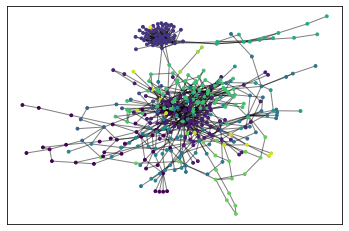

In [19]:
def drawgraph(g,menberships):# draw the graph
    pos = nx.spring_layout(g)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(menberships.values()) + 1)
    nx.draw_networkx_nodes(g, pos, menberships.keys(), node_size=8,
                           cmap=cmap, node_color=list(menberships.values()))
    nx.draw_networkx_edges(g, pos, alpha=0.5)
    plt.show()
drawgraph(g,partition)

# GEMSEC

In [20]:
from karateclub import GEMSEC
GEMSEC_g = GEMSEC()
GEMSEC_g.fit(g)
print(GEMSEC_g.get_memberships())

{0: 7, 1: 7, 2: 7, 3: 7, 4: 7, 5: 7, 6: 7, 7: 7, 8: 7, 9: 7, 10: 7, 11: 8, 12: 2, 13: 3, 14: 8, 15: 2, 16: 7, 17: 7, 18: 4, 19: 7, 20: 7, 21: 7, 22: 7, 23: 8, 24: 1, 25: 7, 26: 7, 27: 7, 28: 7, 29: 8, 30: 5, 31: 7, 32: 7, 33: 8, 34: 7, 35: 7, 36: 7, 37: 7, 38: 7, 39: 7, 40: 5, 41: 7, 42: 7, 43: 7, 44: 7, 45: 7, 46: 2, 47: 0, 48: 3, 49: 7, 50: 7, 51: 7, 52: 5, 53: 4, 54: 7, 55: 7, 56: 7, 57: 3, 58: 6, 59: 7, 60: 7, 61: 0, 62: 7, 63: 0, 64: 7, 65: 7, 66: 7, 67: 0, 68: 7, 69: 2, 70: 7, 71: 7, 72: 7, 73: 7, 74: 7, 75: 8, 76: 7, 77: 7, 78: 1, 79: 2, 80: 8, 81: 0, 82: 6, 83: 7, 84: 3, 85: 7, 86: 0, 87: 7, 88: 3, 89: 7, 90: 7, 91: 7, 92: 1, 93: 2, 94: 0, 95: 7, 96: 3, 97: 7, 98: 7, 99: 7, 100: 2, 101: 3, 102: 6, 103: 7, 104: 7, 105: 0, 106: 7, 107: 7, 108: 9, 109: 7, 110: 7, 111: 7, 112: 3, 113: 8, 114: 7, 115: 7, 116: 7, 117: 7, 118: 7, 119: 7, 120: 7, 121: 2, 122: 7, 123: 8, 124: 6, 125: 3, 126: 7, 127: 4, 128: 0, 129: 7, 130: 7, 131: 6, 132: 7, 133: 2, 134: 7, 135: 9, 136: 5, 137: 7, 138: 

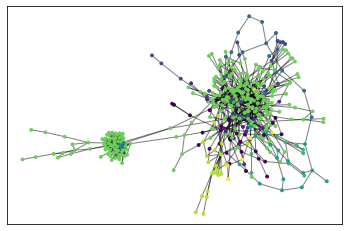

In [21]:
drawgraph(g,GEMSEC_g.get_memberships())

## EdMot

In [22]:
from karateclub import EdMot
EdMot_g = EdMot()
EdMot_g.fit(g)
print(EdMot_g.get_memberships())

{0: 0, 108: 1, 183: 0, 71: 0, 1: 0, 77: 2, 53: 3, 262: 0, 393: 3, 2: 4, 55: 0, 58: 5, 326: 0, 122: 4, 401: 1, 3: 1, 4: 4, 294: 4, 245: 4, 250: 4, 249: 4, 5: 12, 30: 12, 6: 2, 47: 11, 345: 2, 7: 8, 68: 8, 196: 4, 110: 0, 10: 0, 344: 8, 8: 9, 367: 9, 216: 9, 9: 0, 296: 0, 226: 0, 149: 0, 121: 10, 178: 0, 348: 11, 11: 12, 357: 12, 12: 10, 388: 10, 263: 10, 13: 7, 201: 5, 302: 7, 14: 12, 113: 0, 275: 12, 15: 10, 133: 10, 342: 10, 16: 1, 177: 0, 203: 1, 338: 1, 403: 13, 17: 13, 307: 0, 228: 2, 107: 13, 34: 13, 209: 13, 18: 3, 286: 3, 257: 3, 280: 3, 271: 3, 267: 3, 224: 3, 242: 3, 236: 15, 233: 3, 303: 3, 253: 3, 304: 3, 360: 3, 327: 3, 332: 3, 333: 3, 335: 15, 339: 3, 353: 3, 358: 3, 362: 3, 364: 3, 384: 15, 306: 3, 215: 3, 377: 3, 194: 3, 264: 3, 259: 3, 319: 3, 341: 3, 361: 3, 399: 3, 204: 3, 22: 3, 45: 3, 83: 3, 19: 3, 98: 3, 175: 3, 90: 3, 142: 3, 139: 3, 137: 9, 164: 15, 127: 3, 118: 15, 116: 3, 115: 3, 134: 3, 20: 12, 282: 2, 301: 12, 21: 0, 373: 0, 366: 0, 23: 12, 154: 12, 24: 12, 1

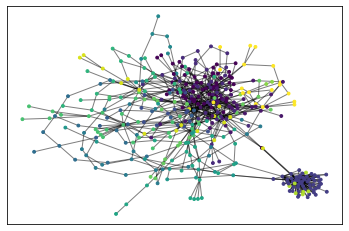

In [23]:
drawgraph(g,EdMot_g.get_memberships())

## SCD

In [24]:
from karateclub import SCD
SCD_g = SCD()
SCD_g.fit(g)
print(SCD_g.get_memberships())

{0: 233, 108: 61, 183: 46, 71: 190, 1: 66, 77: 66, 53: 47, 262: 66, 393: 34, 2: 62, 55: 62, 58: 70, 326: 65, 122: 46, 401: 144, 3: 232, 4: 230, 294: 231, 245: 230, 250: 175, 249: 129, 5: 229, 30: 229, 6: 228, 47: 200, 345: 228, 7: 225, 68: 227, 196: 226, 110: 225, 10: 64, 344: 138, 8: 33, 367: 33, 216: 33, 9: 32, 296: 32, 226: 32, 149: 64, 121: 75, 178: 125, 348: 70, 11: 224, 357: 224, 12: 222, 388: 223, 263: 222, 13: 221, 201: 221, 302: 189, 14: 69, 113: 69, 275: 37, 15: 219, 133: 220, 342: 219, 16: 61, 177: 52, 203: 61, 338: 63, 403: 117, 17: 73, 307: 46, 228: 73, 107: 218, 34: 210, 209: 217, 18: 34, 286: 34, 257: 31, 280: 45, 271: 234, 267: 235, 224: 29, 242: 42, 236: 36, 233: 28, 303: 27, 253: 35, 304: 26, 360: 34, 327: 26, 332: 35, 333: 26, 335: 40, 339: 25, 353: 0, 358: 236, 362: 237, 364: 238, 384: 34, 306: 22, 215: 36, 377: 239, 194: 20, 264: 7, 259: 40, 319: 22, 341: 7, 361: 2, 399: 40, 204: 45, 22: 18, 45: 240, 83: 16, 19: 15, 98: 14, 175: 2, 90: 241, 142: 42, 139: 13, 137: 4

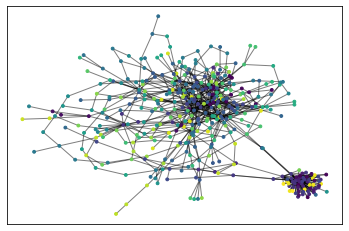

In [25]:
drawgraph(g,SCD_g.get_memberships())